In [1]:
if isfile("Project.toml")
    using Pkg
    Pkg.activate(".")
    using Revise
end

 Activating environment at `C:\Users\genkuroki\OneDrive\work\LambdaExpressions\Project.toml`


In [2]:
using LambdaExpressions
using MetaUtils

┌ Info: Precompiling LambdaExpressions [d7f0caad-bf46-47fc-bf86-cd66e2e49ce6]
└ @ Base loading.jl:1278


In [3]:
expr = :(lambda((x, y), sin(x)*y)(1, 2))
show(expr); println("\n")
show_texpr(expr); println("\n")
translate_lambda(expr) |> show
@eval_lambda lambda((x, y), sin(x)*y)(1, 2)

:((lambda((x, y), sin(x) * y))(1, 2))

(:call, 
    (:call, :lambda, 
        (:tuple, :x, :y), 
        (:call, :*, 
            (:call, :sin, :x), :y)), 1, 2)

:(let
      x = 1
      y = 2
      sin(x) * y
  end)

1.682941969615793

In [4]:
expr = :(lambda((f, x), f(x))(lambda(x, iszero(x) ? 1 : x*f(x-1)), 10))
show(expr); println("\n")
show_texpr(expr); println("\n")
translate_lambda(expr) |> show
@eval_lambda lambda((f, x), f(x))(
    lambda(x, iszero(x) ? 1 : x*f(x-1)),
    10
)

:((lambda((f, x), f(x)))(lambda(x, if iszero(x)
              1
          else
              x * f(x - 1)
          end), 10))

(:call, 
    (:call, :lambda, 
        (:tuple, :f, :x), 
        (:call, :f, :x)), 
    (:call, :lambda, :x, 
        (:if, 
            (:call, :iszero, :x), 1, 
            (:call, :*, :x, 
                (:call, :f, 
                    (:call, :-, :x, 1))))), 10)

:(let
      f = (x->if iszero(x)
                  1
              else
                  x * f(x - 1)
              end)
      x = 10
      f(x)
  end)

3628800

In [5]:
@eval_lambda lambda((f, x), f(x))(
    x -> iszero(x) ? 1 : x*f(x-1),
    10
)

3628800

In [6]:
@show_texpr (lambda((assoc, k, v), assoc(k, v)))(
    lambda((k, v), 
        eq(v, nil)         ? nil    :
        eq(car(car(v)), k) ? car(v) :
        assoc(k, cdr(v))),
    :Orange,
    ((:Apple, 120), (:Orange, 210), (:Lemmon, 180), nil))

(:call, 
    (:call, :lambda, 
        (:tuple, :assoc, :k, :v), 
        (:call, :assoc, :k, :v)), 
    (:call, :lambda, 
        (:tuple, :k, :v), 
        (:if, 
            (:call, :eq, :v, :nil), :nil, 
            (:if, 
                (:call, :eq, 
                    (:call, :car, 
                        (:call, :car, :v)), :k), 
                (:call, :car, :v), 
                (:call, :assoc, :k, 
                    (:call, :cdr, :v))))), QuoteNode(:Orange), 
    (:tuple, 
        (:tuple, QuoteNode(:Apple), 120), 
        (:tuple, QuoteNode(:Orange), 210), 
        (:tuple, QuoteNode(:Lemmon), 180), :nil))

In [7]:
@translate_lambda (lambda((assoc, k, v), assoc(k, v)))(
    lambda((k, v), 
        eq(v, nil)         ? nil    :
        eq(car(car(v)), k) ? car(v) :
        assoc(k, cdr(v))),
    :Orange,
    ((:Apple, 120), (:Orange, 210), (:Lemmon, 180), nil))

:(let
      assoc = ((k, v)->if eq(v, nil)
                  nil
              else
                  if eq(car(car(v)), k)
                      car(v)
                  else
                      assoc(k, cdr(v))
                  end
              end)
      k = :Orange
      v = ((:Apple, 120), (:Orange, 210), (:Lemmon, 180), nil)
      assoc(k, v)
  end)

In [8]:
@eval_lambda (lambda((assoc, k, v), assoc(k, v)))(
    lambda((k, v), 
        eq(v, nil)         ? nil    :
        eq(car(car(v)), k) ? car(v) :
        assoc(k, cdr(v))),
    :Apple,
    ((:Apple, 120), (:Orange, 210), (:Lemmon, 180), nil))

(:Apple, 120)

In [9]:
@eval_lambda (lambda((assoc, k, v), assoc(k, v)))(
    lambda((k, v), 
        eq(v, nil)         ? nil    :
        eq(car(car(v)), k) ? car(v) :
        assoc(k, cdr(v))),
    :Orange,
    ((:Apple, 120), (:Orange, 210), (:Lemmon, 180), nil))

(:Orange, 210)

In [10]:
@eval_lambda (lambda((assoc, k, v), assoc(k, v)))(
    lambda((k, v), 
        eq(v, nil)         ? nil    :
        eq(car(car(v)), k) ? car(v) :
        assoc(k, cdr(v))),
    :Lemmon,
    ((:Apple, 120), (:Orange, 210), (:Lemmon, 180), nil))

(:Lemmon, 180)

In [11]:
@eval_lambda (lambda((assoc, k, v), assoc(k, v)))(
    lambda((k, v), 
        eq(v, nil)         ? nil    :
        eq(car(car(v)), k) ? car(v) :
        assoc(k, cdr(v))),
    :Melon,
    ((:Apple, 120), (:Orange, 210), (:Lemmon, 180), nil))

nil

In [12]:
texpr_exmaple4(x) = (:call, 
    (:lambda, (:tuple, :assoc, :k, :v), (:call, :assoc, :k, :v)), 
    (:lambda, (:tuple, :k, :v), 
        (:if, (:eq, :v, (:tuple,)), :nil,
            (:if, (:eq, (:car, (:car, :v)), :k), (:car, :v), 
                (:call, :assoc, :k, (:cdr, :v))))), 
    QuoteNode(x), 
    (:tuple, 
        (:tuple, QuoteNode(:Apple),  120), 
        (:tuple, QuoteNode(:Orange), 210), 
        (:tuple, QuoteNode(:Lemmon), 180), :nil))

texpr_exmaple4 (generic function with 1 method)

In [13]:
texpr_exmaple4(:Apple) |> texpr2expr |> eval_lambda

(:Apple, 120)

In [14]:
texpr_exmaple4(:Orange) |> texpr2expr |> eval_lambda

(:Orange, 210)

In [15]:
texpr_exmaple4(:Lemmon) |> texpr2expr |> eval_lambda

(:Lemmon, 180)

In [16]:
texpr_exmaple4(:Melon) |> texpr2expr |> eval_lambda

nil

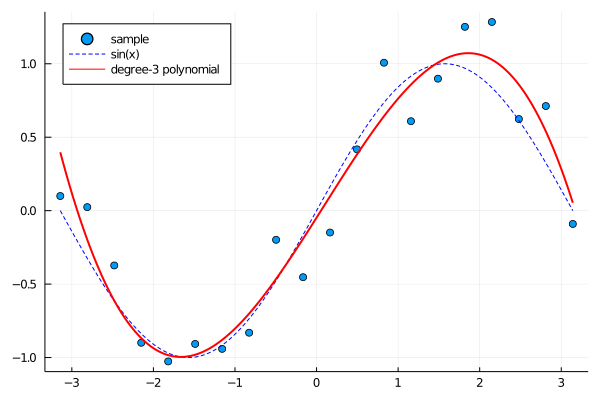

In [17]:
begin
    using Plots
    n = 20
    x = range(-π, π; length=20)
    noise = 0.3randn(n)
    y = sin.(x) + noise
    X = hcat((x.^k for k in 0:3)...)
    b = X\y
    f(x) = sum(b[k+1]*x^k for k in 0:3)
    xs = range(-π, π; length=400)
    plot(; legend=:topleft)
    scatter!(x, y; label="sample")
    plot!(xs, sin.(xs); label="sin(x)", color=:blue, ls=:dash)
    plot!(xs, f.(xs); label="degree-3 polynomial", color=:red, lw=2)
end

In [18]:
@show_texpr begin
    using Plots
    n = 20
    x = range(-π, π; length=20)
    noise = 0.3randn(n)
    y = sin.(x) + noise
    X = hcat((x.^k for k in 0:3)...)
    b = X\y
    f(x) = sum(b[k+1]*x^k for k in 0:3)
    xs = range(-π, π; length=400)
    plot(; legend=:topleft)
    scatter!(x, y; label="sample")
    plot!(xs, sin.(xs); label="sin(x)", color=:blue, ls=:dash)
    plot!(xs, f.(xs); label="degree-3 polynomial", color=:red, lw=2)
end

(:block, 
    (:using, 
        (:., :Plots)), 
    (:(=), :n, 20), 
    (:(=), :x, 
        (:call, :range, 
            (:parameters, 
                (:kw, :length, 20)), 
            (:call, :-, :π), :π)), 
    (:(=), :noise, 
        (:call, :*, 0.3, 
            (:call, :randn, :n))), 
    (:(=), :y, 
        (:call, :+, 
            (:., :sin, 
                (:tuple, :x)), :noise)), 
    (:(=), :X, 
        (:call, :hcat, 
            (:..., 
                (:generator, 
                    (:call, :.^, :x, :k), 
                    (:(=), :k, 
                        (:call, :(:), 0, 3)))))), 
    (:(=), :b, 
        (:call, :\, :X, :y)), 
    (:(=), 
        (:call, :f, :x), 
        (:block, 
            (:call, :sum, 
                (:generator, 
                    (:call, :*, 
                        (:ref, :b, 
                            (:call, :+, :k, 1)), 
                        (:call, :^, :x, :k)), 
                    (:(=), :k, 
                        (:call

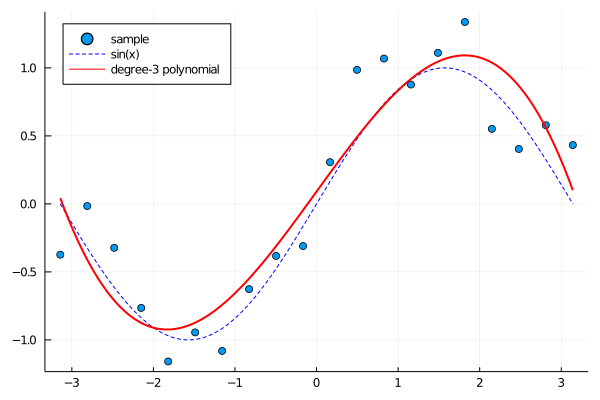

In [19]:
@teval (:block, 
    (:using, (:., :Plots)), 
    (:(=), :n, 20), 
    (:(=), :x, (:range, (:parameters, (:kw, :length, 20)), (:-, :π), :π)), 
    (:(=), :noise, (:*, 0.3, (:randn, :n))), 
    (:(=), :y, (:+, (:., :sin, (:tuple, :x)), :noise)), 
    (:(=), :X, 
        (:hcat, (:..., (:generator, (:call, :.^, :x, :k), (:(=), :k, (:(:), 0, 3)))))), 
    (:(=), :b, (:\, :X, :y)), 
    (:(=), (:call, :f, :x), 
        (:sum, (:generator, (:*, (:ref, :b, (:+, :k, 1)), (:^, :x, :k)), 
            (:(=), :k, (:(:), 0, 3))))), 
    (:(=), :xs, (:range, (:parameters, (:kw, :length, 400)), (:-, :π), :π)), 
    (:plot, (:parameters, (:kw, :legend, QuoteNode(:topleft)))), 
    (:scatter!, (:parameters, (:kw, :label, "sample")), :x, :y), 
    (:plot!, (:parameters, 
            (:kw, :label, "sin(x)"), 
            (:kw, :color, QuoteNode(:blue)), 
            (:kw, :ls, QuoteNode(:dash))), 
        :xs, (:., :sin, (:tuple, :xs))), 
    (:plot!, (:parameters, 
            (:kw, :label, "degree-3 polynomial"), 
            (:kw, :color, QuoteNode(:red)), 
            (:kw, :lw, 2)), 
        :xs, (:., :f, (:tuple, :xs))))

In [20]:
(:block, 
    (:using, (:., :Plots)), 
    (:(=), :n, 20), 
    (:(=), :x, (:range, (:parameters, (:kw, :length, 20)), (:-, :π), :π)), 
    (:(=), :noise, (:*, 0.3, (:randn, :n))), 
    (:(=), :y, (:+, (:., :sin, (:tuple, :x)), :noise)), 
    (:(=), :X, 
        (:hcat, (:..., (:generator, (:call, :.^, :x, :k), (:(=), :k, (:(:), 0, 3)))))), 
    (:(=), :b, (:\, :X, :y)), 
    (:(=), (:call, :f, :x), 
        (:sum, (:generator, (:*, (:ref, :b, (:+, :k, 1)), (:^, :x, :k)), 
            (:(=), :k, (:(:), 0, 3))))), 
    (:(=), :xs, (:range, (:parameters, (:kw, :length, 400)), (:-, :π), :π)), 
    (:plot, (:parameters, (:kw, :legend, QuoteNode(:topleft)))), 
    (:scatter!, (:parameters, (:kw, :label, "sample")), :x, :y), 
    (:plot!, (:parameters, 
            (:kw, :label, "sin(x)"), 
            (:kw, :color, QuoteNode(:blue)), 
            (:kw, :ls, QuoteNode(:dash))), 
        :xs, (:., :sin, (:tuple, :xs))), 
    (:plot!, (:parameters, 
            (:kw, :label, "degree-3 polynomial"), 
            (:kw, :color, QuoteNode(:red)), 
            (:kw, :lw, 2)), 
        :xs, (:., :f, (:tuple, :xs)))) |> texpr2expr |> 
x -> display("text/markdown", "```julia\n$x\n```")

```julia
begin
    using Plots
    n = 20
    x = range(-π, π; length = 20)
    noise = 0.3 * randn(n)
    y = sin.(x) + noise
    X = hcat((x .^ k for k = 0:3)...)
    b = X \ y
    f(x) = sum((b[k + 1] * x ^ k for k = 0:3))
    xs = range(-π, π; length = 400)
    plot(; legend = :topleft)
    scatter!(x, y; label = "sample")
    plot!(xs, sin.(xs); label = "sin(x)", color = :blue, ls = :dash)
    plot!(xs, f.(xs); label = "degree-3 polynomial", color = :red, lw = 2)
end
```